# Linear Regression Exploration 1D

## 8-9-2018

### Setup

In [295]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [296]:
x = np.arange(0, 10, 0.01)
m = 1#np.random.randint(-2, 2)
b= np.random.randn()*3
y = m * x + np.random.randn(y.shape[0]) + b

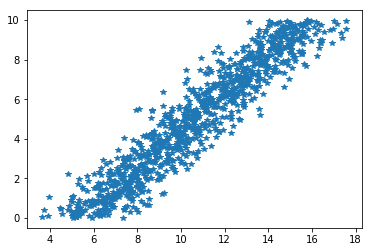

In [297]:
plt.plot(y, x, '*')

In [298]:
x = x.reshape(1, y.shape[0])
w = np.random.randn(x.shape[0], 1)
b = 0

In [299]:
(w.T @ x[:, 1]).item()

0.010059098487025542

In [300]:
def loss(yi, y):
    return np.mean((y - yi)**2)/2
    

### Stochaistic gradient descent

In [301]:
epochs = 100
lr = 0.01
for e in range(epochs):
    for i in range(x.shape[1]):
        # foward propagate
        y_hat = (w.T @ x[:,i] + b).item()
        # back propagate
        d_yhat = y_hat - y[i]
        
        d_b = d_yhat
        d_w = d_yhat * x[:,i]
        
        # update
        w -= lr * d_w
        b -= lr * d_b
        

In [302]:
x[0,:].shape, y.shape, y_p.shape

((1000,), (1000,), (1000,))

In [303]:
y_p = (w.item() * x + b).squeeze()

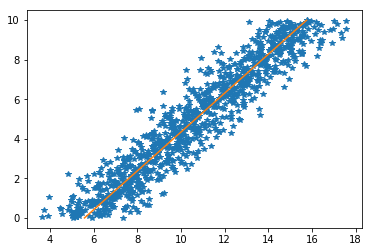

In [304]:
plt.plot(y, x[0,:], '*')
plt.plot(y_p, x[0,:], '-')

In [305]:
w,b

(array([[1.01888696]]), 5.573114043449744)

In [306]:
print(f"Loss with SGD after 40 epoch is {loss(y, y_p)}")

Loss with SGD after 40 epoch is 0.48406626530439517


## Stochastic gradient descent mini batch

In [415]:
w = np.random.randn(x.shape[0], 1)
b = 0.0

In [421]:
epochs = 100
lr = 0.01
bs = 100
indices = np.arange(x.shape[1])
for e in range(epochs):
    bsi = np.random.choice(indices, bs, replace=False)
    dw, db = np.zeros_like(w), np.zeros_like(b)
    # mini batch
    for i in bsi:
        # forward
        y_hat = (w.T @ x[:,i] + b).item()
        # back propagate
        d_yhat = y_hat - y[i]
        dw += d_yhat * x[:,i]
        db += d_yhat
    dw /= bs
    db /= bs
    w -= lr * dw
    b -= lr * db

In [422]:
w,b

(array([[1.05360971]]), 5.250592236141519)

In [423]:
y_p = (w.item() * x + b).squeeze()

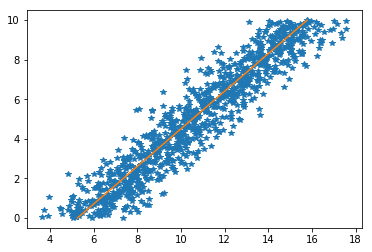

In [424]:
plt.plot(y, x[0,:], '*')
plt.plot(y_p, x[0,:], '-')

In [425]:
print(f"Loss with SGD with mini batch after 40 epoch is {loss(y, y_p)}")

Loss with SGD with mini batch after 40 epoch is 0.4980941403502671


in the sgd case, running 100 epoch means seeing 10,000 training results, in the case of mini batch, running 100 epoch means seeing 1000 training results, 

## Extend to multiple dimension?